# Pneumonia_Chest_X-Ray

CNN image detection of pneumonia from chest xrays.  
Project By: [Uzair Bin Asim](https://github.com/Uzair05)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
import os 
import zipfile

## Download dataset
Make sure to navigate to the proper directory.

In [ ]:
#!pip install --upgrade kaggle

## Remeber to navigate to proper directory.
!cd "/content/drive/MyDrive/nih_xray" && kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

In [ ]:
os.chdir("/content/drive/MyDrive/nih_xray") ## Remeber to navigate to proper directory.
print(os.getcwd())

In [17]:
try:
    if not os.path.isdir("./data"):
        os.mkdir("./data")
except Exception as err:
    print(f"Error in creating data/:\t{err}")

if os.path.isfile("./chest-xray-pneumonia.zip"):
    localzip = "./chest-xray-pneumonia.zip"
    with zipfile.ZipFile(localzip, 'r') as zip_ref:
        zip_ref.extractall('data/')

In [18]:
## Clean the dataspace
#!rm -rf data/chest_xray/__MACOSX && cd data/ && find -type f | grep -E "\.DS_Store" | xargs -I{} rm {}

## Handle Data
Create the train, test, and validation datasets.

In [ ]:
!pip install --upgrade tensorflow==2.7

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf ## Using tensorflow==2.7
import matplotlib.pyplot as plt

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
main_path = "data/chest_xray/chest_xray"

test_dir, train_dir = os.path.join(main_path, "test"), os.path.join(main_path, "train")
validation_dir = os.path.join(main_path, "val") 

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0, 
    rotation_range=10, 
    width_shift_range=0.3, 
    height_shift_range=0.3, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)
val_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

In [24]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150,150), 
    class_mode='binary', 
    batch_size=20
)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(150,150), 
    class_mode='binary', 
    batch_size=20
)
val_generator = val_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150,150), 
    class_mode='binary', 
    batch_size=20
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Create Model - v2

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, padding='same', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 87616)            

## Train Model - v1

In [29]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        accuracy = 0.99 # Percentage Accuracy.
        if(logs.get('accuracy') != None) and (logs.get('accuracy') >= accuracy): # Experiment with changing this value
          print(f"\nReached {accuracy*100}% accuracy so cancelling training!")
          self.model.stop_training = True

callbacks = myCallback()

In [30]:
## Using Google Colab TPU
history = model.fit(
    train_generator, 
    validation_data = test_generator,
    steps_per_epoch = 259, 
    epochs = 10,
    validation_steps = 30,
    verbose = 1, 
    callbacks=[callbacks]
)

Epoch 1/10
259/259 [==============================] - 514s 2s/step - loss: 0.5219 - accuracy: 0.7326 - val_loss: 0.6154 - val_accuracy: 0.6317
Epoch 2/10
259/259 [==============================] - 509s 2s/step - loss: 0.4499 - accuracy: 0.7724 - val_loss: 0.9189 - val_accuracy: 0.6233
Epoch 3/10
259/259 [==============================] - 502s 2s/step - loss: 0.3515 - accuracy: 0.8418 - val_loss: 0.6225 - val_accuracy: 0.7300
Epoch 4/10
259/259 [==============================] - 501s 2s/step - loss: 0.3056 - accuracy: 0.8611 - val_loss: 0.4920 - val_accuracy: 0.7433
Epoch 5/10
259/259 [==============================] - 508s 2s/step - loss: 0.2754 - accuracy: 0.8804 - val_loss: 0.6086 - val_accuracy: 0.7550
Epoch 6/10
259/259 [==============================] - 501s 2s/step - loss: 0.2611 - accuracy: 0.8847 - val_loss: 0.4254 - val_accuracy: 0.8133
Epoch 7/10
259/259 [==============================] - 491s 2s/step - loss: 0.2512 - accuracy: 0.8885 - val_loss: 0.4703 - val_accuracy: 0.7800

## Evaluation

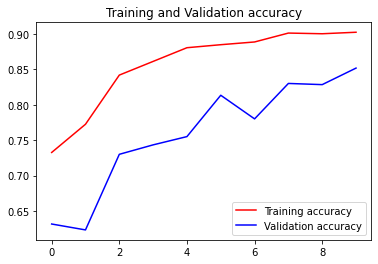

<Figure size 432x288 with 0 Axes>

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## Save Model

In [32]:
tf.keras.models.save_model(model, filepath="./my_model/OwnCNN_EfficientNetB3_99p.h5", overwrite=True, save_format='h5')

## Train Model - v2

### Load appended data
Author provided extra data in a different directory during update.

In [ ]:
main_path = "data/chest_xray/"

test_dir, train_dir = os.path.join(main_path, "test"), os.path.join(main_path, "train")
validation_dir = os.path.join(main_path, "val") 

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0, 
    rotation_range=10, 
    width_shift_range=0.3, 
    height_shift_range=0.3, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
)
test_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)
val_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150,150), 
    class_mode='binary', 
    batch_size=20
)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(150,150), 
    class_mode='binary', 
    batch_size=20
)
val_generator = val_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150,150), 
    class_mode='binary', 
    batch_size=20
)

### Second Training

In [ ]:
history = model.fit(
    train_generator, 
    validation_data = test_generator,
    #steps_per_epoch = 100,
    epochs = 20,
    validation_steps = 50,
    verbose = 2
)

### Second Evaluation

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

### Save Model
Overwrite Previous Save

In [ ]:
tf.keras.models.save_model(model, filepath="./my_model/OwnCNN_EfficientNetB3_99p.h5", overwrite=True, save_format='h5')